<a href="https://colab.research.google.com/github/jcdevaney/audioAnalysisWorkshop/blob/master/audioAnalysisWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load files from Git repository

In [1]:
!git clone https://github.com/jcdevaney/audioAnalysisWorkshop.git

Cloning into 'audioAnalysisWorkshop'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 31 (delta 3), reused 7 (delta 0), pack-reused 14
Receiving objects: 100% (31/31), 14.22 MiB | 17.86 MiB/s, done.
Resolving deltas: 100% (4/4), done.


# Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

# Define a function to plot a spectrogram with an overlay data exported from a VAMP plugin

In [3]:
def overlayPlot(audiofile,dataDF,title):
    # open audio file
    y, fs = librosa.load(audiofile)

    # run the short time fourier transform
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Create a figure and primary axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Display the spectrogram on the left y-axis
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=fs, x_axis='time', y_axis='log')
    ax1.set_ylabel('Spectrogram Power (dB)', color='tab:red')

    # Create a secondary y-axis and plot the time series on it
    ax2 = ax1.twinx()
    ax2.plot(dataDF['Time'], dataDF['Data'], label='Time Series', color='tab:blue')
    ax2.set_ylabel('Energy', color='tab:blue')

    # Add a colorbar for the spectrogram
    cbar = plt.colorbar(format='%+2.0f dB', ax=ax1)
    cbar.set_label('Power (dB)')

    plt.title(title)
    plt.show()


# Load and examine a VAMP plugin csv file

In [4]:
# load CSV file, adding column names for time and data
csvEx = pd.read_csv('/content/audioAnalysisWorkshop/audio/avm_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
csvEx

,Time,Data
0,0.000000,0.001507
1,0.023220,0.001074
2,0.046440,0.001062
3,0.069660,0.000845
4,0.092880,0.000870
...,...,...
489,11.354558,0.001692
490,11.377778,0.001666
491,11.400998,0.002047
492,11.424218,0.002216


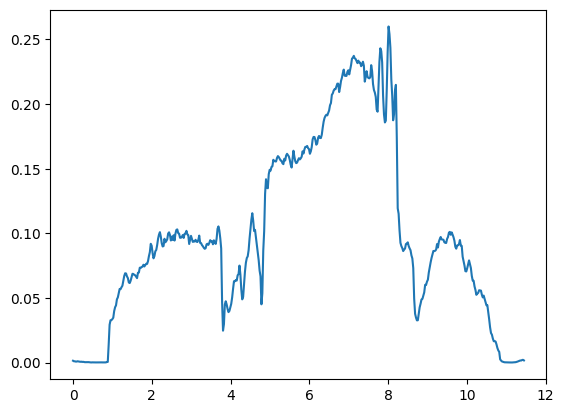

In [5]:
# plot the imported CSV data, using the time values for the x-axis
plt.plot(csvEx['Time'],csvEx['Data'])

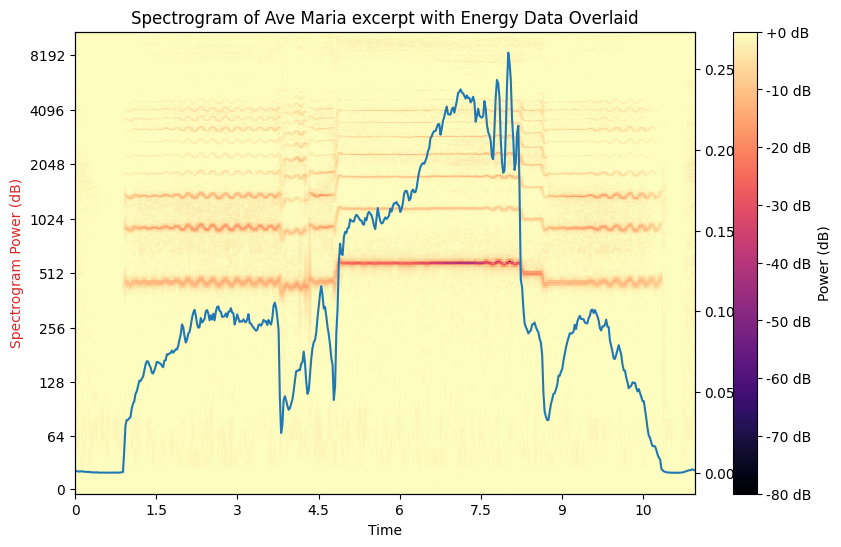

In [6]:
# plot the imported CSV data over a spectrogram of the correspponding audio
audiofileEX = '/content/audioAnalysisWorkshop/audio/avm.wav'
titleEX = 'Spectrogram of Ave Maria excerpt with Energy Data Overlaid'
overlayPlot(audiofileEX,csvEx,titleEX)

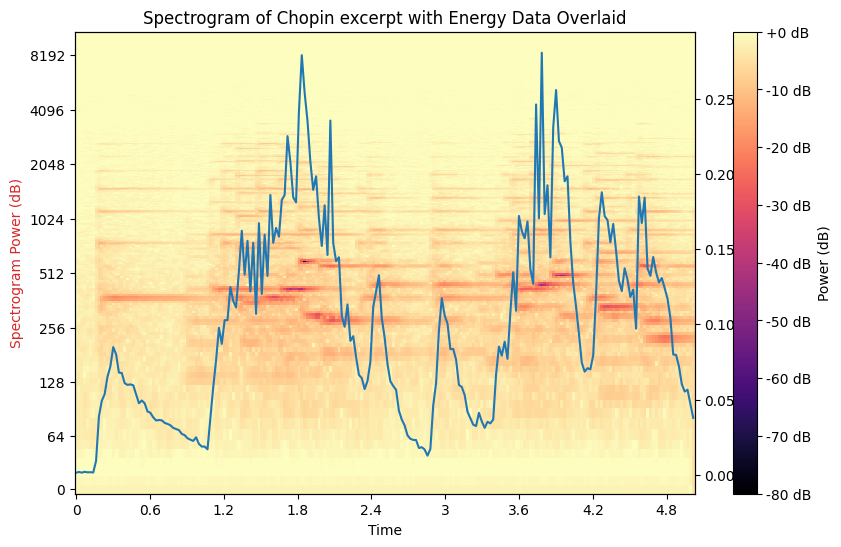

In [7]:
audiofileChopin = '/content/audioAnalysisWorkshop/audio/chopinSeg.wav'
csvChopin = pd.read_csv('/content/audioAnalysisWorkshop/audio/chopinSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
titleChopin = 'Spectrogram of Chopin excerpt with Energy Data Overlaid'

overlayPlot(audiofileChopin,csvChopin,titleChopin)

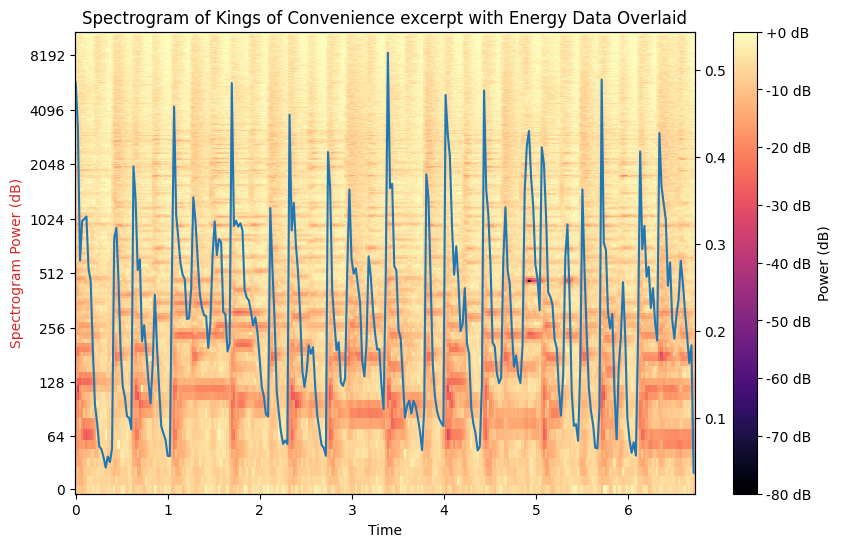

In [8]:
audiofileKings = '/content/audioAnalysisWorkshop/audio/kingsLoop.wav'
csvKings = pd.read_csv('/content/audioAnalysisWorkshop/audio/kingsLoop_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
titleKings = 'Spectrogram of Kings of Convenience excerpt with Energy Data Overlaid'

overlayPlot(audiofileKings,csvKings,titleKings)

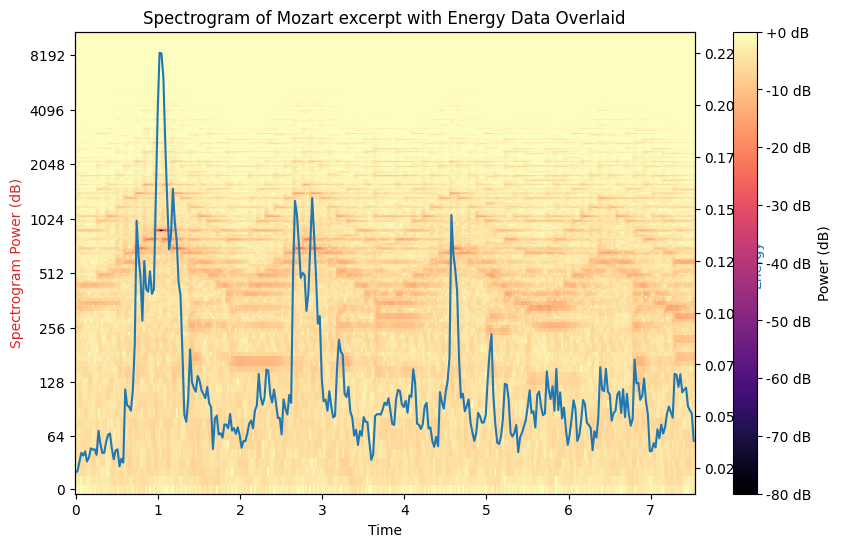

In [9]:
audiofileMozart = '/content/audioAnalysisWorkshop/audio/mozartSeg.wav'
csvMozart = pd.read_csv('/content/audioAnalysisWorkshop/audio/mozartSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
titleMozart = 'Spectrogram of Mozart excerpt with Energy Data Overlaid'

overlayPlot(audiofileMozart,csvMozart,titleMozart)